<p float="left">
  <img src="climate_net/img/CCfCS.png" width="100" />
  <img src="climate_net/img/cam.png" width="100" />
</p>

# CCfCS ML for Climate Science -  Notebook 2. Introduction to Machine Learning

In this brief session we will introduce the fundamentals of machine learning through one of the simplest 'machine learning' methods...linear regression.

To me...

**Machine learning = model + data** 

Machine learning is primarily about **prediction**. We are interested at learning the relationship between some variables which allows us to make a prediction about the variable of interest $Y$ given some values of our other variables $X$.
****

We will look at the traditional scheme of machine learning, which is *supervised machine learning*.

We will try to illustrate how this works through an example.

First load in the required external libraries for python. 

*If running in Google Colab, then uncomment and run the following (You must have first added a shortcut to your GDrive - see [here](https://github.com/Ira-Shokar/CCFCS-Machine-Learning-Workshop)):*

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#%pip install -r /content/drive/MyDrive/climate_net/env.txt

In [2]:
# imports

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
import netCDF4 as nc
import matplotlib.pylab as plt
#import cmocean 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import urllib.request as urllib2
import xarray as xr
from scipy import stats

Now load in some example data file. For our purposes here we are using the ClimateNet dataset described here https://gmd.copernicus.org/articles/14/107/2021/ which itself takes snapshots from the Community Atmospheric Model (CAM5.1) output: https://www.cesm.ucar.edu/models/cesm1.0/cam/docs/description/cam5_desc.pdf. Don't worry too much about the specifics of the data, we are more interested in exploring here. 

First we construct a python string containing the location of the file then load this as an 'xarray' (a nice way of viewing and handling the tabulated data).

*If running in Google Colab, make sure to follow the instructions at the top of the page, before uncommenting the second code cell below and running that instead of the following.*

In [5]:
### Read in some data from our climate problem

# read data

# date = '2011-06-01-01-1_0'
ds = xr.open_dataset('climate_net/test.nc')

# Organise it into a numpy array which we can deal with, preferably with two things with a linear relationship!


In [ ]:
# ds = xr.open_dataset('/content/drive/MyDrive/climate_net/test.nc')

In [6]:
ds

<xarray.Dataset>
Dimensions:  (lat: 768, lon: 1152, time: 61)
Coordinates:
  * lat      (lat) float64 -90.0 -89.77 -89.53 -89.3 ... 89.3 89.53 89.77 90.0
  * lon      (lon) float64 0.0 0.3125 0.625 0.9375 ... 358.8 359.1 359.4 359.7
  * time     (time) object 'data-2011-06-01-01-1.nc' ... 'data-2013-09-27-01-...
Data variables: (12/17)
    TMQ      (time, lat, lon) float32 ...
    U850     (time, lat, lon) float32 ...
    V850     (time, lat, lon) float32 ...
    UBOT     (time, lat, lon) float32 ...
    VBOT     (time, lat, lon) float32 ...
    QREFHT   (time, lat, lon) float32 ...
    ...       ...
    TS       (time, lat, lon) float32 ...
    TREFHT   (time, lat, lon) float32 ...
    Z1000    (time, lat, lon) float32 ...
    Z200     (time, lat, lon) float32 ...
    ZBOT     (time, lat, lon) float32 ...
    LABELS   (time, lat, lon) int64 ...

In [7]:
#Load in the values of the latitude and longitude from the dataset, and print the array of longitude values (which unsurprisingly go from 0 to 360)
lon = ds.lon.values
lat = ds.lat.values 
print(lon) 

[0.000000e+00 3.125000e-01 6.250000e-01 ... 3.590625e+02 3.593750e+02
 3.596875e+02]


In [69]:
# This time we are going to load in a number of variables, including temperature at 200 and 500 metres.
T200 = ds.T200.values
T500 = ds.T500.values

ZBOT = ds.ZBOT.values
Z200 = ds.Z200.values
Z1000 = ds.Z1000.values

VBOT = ds.VBOT.values
V850 = ds.V850.values

UBOT = ds.UBOT.values
U850 = ds.U850.values

print(T200.shape)
print(T500.shape)

(61, 768, 1152)
(61, 768, 1152)


In [70]:
#Select the first column of the first dimension using square brackets (python starts indexing at 0) and print values from the 2D array.
#These are the values of U850 at each latitude and longitude
print(Z200[0])

[[10553.736  10553.736  10553.736  ... 10553.736  10553.736  10553.736 ]
 [10550.262  10550.244  10550.221  ... 10550.3125 10550.294  10550.278 ]
 [10545.115  10545.06   10545.007  ... 10545.278  10545.224  10545.17  ]
 ...
 [11340.517  11340.529  11340.54   ... 11340.485  11340.497  11340.506 ]
 [11337.     11337.009  11337.018  ... 11336.974  11336.982  11336.991 ]
 [11334.099  11334.099  11334.099  ... 11334.099  11334.099  11334.099 ]]


# We want to learn the relationship between two things...

Let's make a plot of two variables that we expect to be loosely linearly related globally, the wind at the surface and the wind at 850m altitude

Text(0, 0.5, 'Windspeed at 850m altitude (m s$^{-1})')

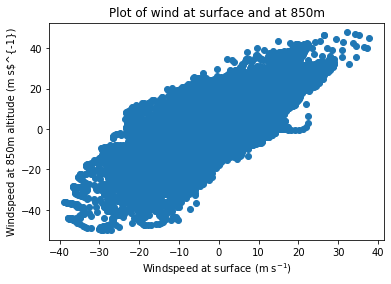

In [71]:
plt.scatter(UBOT[0], U850[0])
plt.title('Plot of wind at surface and at 850m')
plt.xlabel('Windspeed at surface (m s$^{-1}$)')
plt.ylabel('Windspeed at 850m altitude (m s$^{-1}$)')

We see a broadly linear relationship between these two variables.

## We are interested in learning the relationship between $X$ and $Y$.
So first, we need to choose a **model**. We will take a very simple example, linear regression. There are a wide variety of models available.

This model takes the form, where $y$ is the value we wish to predict, and $x_n$ are the covariates: 

$y$ = β$_0$ + β$_1$$x_1$ + β$_2$$x_2$ + ...

We then want to learn the parameters, β$_n$!


# Cost Functions and Gradient Descent

Cost, or loss, functions allow us to determine a measure of how well our model's predictions are doing compared to the known, true values of $y$. We can then either minimise this directly, or use **gradient descent** to minimise the cost, and maximise the model's performance.

Choosing a loss function is an important part of machine learning, and encodes a number of assumptions about the relationship and the type of noise observed in our data.

Gradient descent is the mule of machine learning. Gradient descent allows us to minimise the cost, and hence produce a model which fits our training data with skill.

For this example, we will choose a common and hopefully familiar loss function, the mean squared loss.


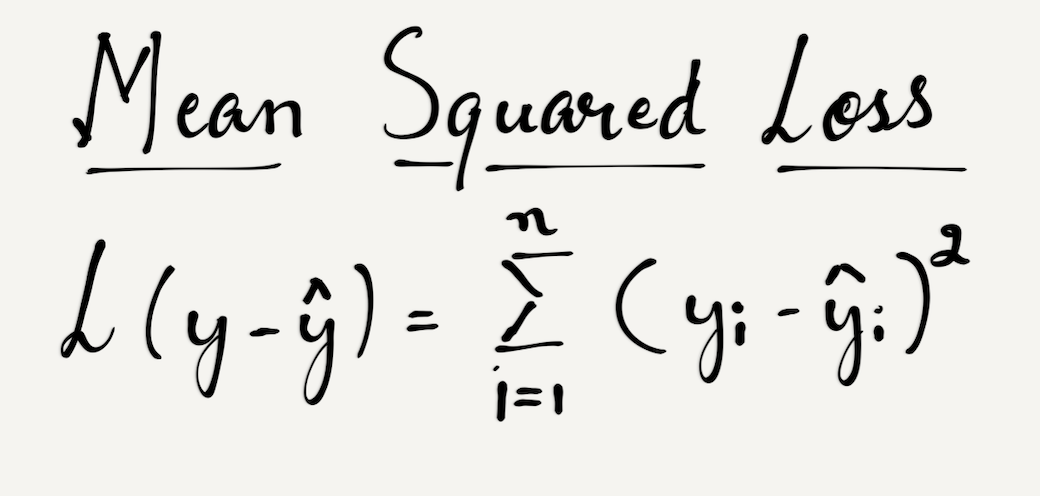

So the idea here is that we are trying to minimise this loss given our model and its parameters, which we chose as modellers. In simple cases, we can find the minimum explicitly, but often in machine learning, gradient descent is used to minimise our loss.

Gradient descent for optimising a single parameter, or weight, is illustrated in the image below.

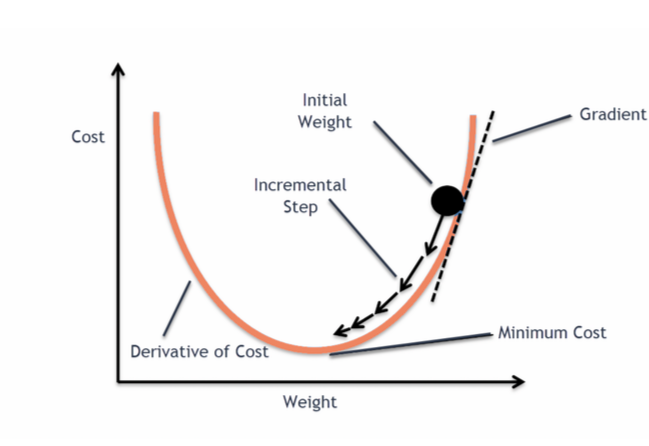

Simply put, we make an initial guess for our model parameter, we then find the derivative of the cost function, and make steps towards the optimal value of the parameter, where the cost is at a minimum.

# Validation of the skill of our model

Now, we may be able to fit our data with our model very well. However, given that machine learning is primarily a predictive endeavour, we need a way to evaluate whether our model is able to make good predictions on new data. 

In order to simulate this, in machine learning it is traditional to split our data into *training*, *validation* and *test* datasets. 

## Training data

Training data is the data we use to optimise our model, and find the values of the parameters which result in an optimal fit. Typically the majority of the available data is used to train the model (e.g. 70% of data).

## Validation data

Validation data is typically used to optimise the hyperparameters of our model, or indeed decide which model we should use. Ira will describe this a little more in the next session.

## Test data

Test data is used to evaluate how skillful our final model is. The model should not be deployed on this dataset until the very end of a project in order to make this as fair a test as possible.


# Let's do it for our example!

In [72]:
UBOT = ds.UBOT.values[0] # let's take this as our x
U850 = ds.U850.values[0] # let's take this as y

Coefficients: 
 [1.0476646]
Mean squared error: 15.72
Coefficient of determination (R$^2$): 0.74


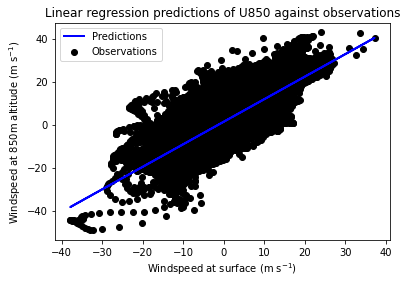

In [75]:
## Code which runs linear regression

## Here we simply split the data into train and test datasets.

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(UBOT, U850, test_size=0.33, random_state=42)

X_train = X_train_2d.flatten()
X_test = X_test_2d.flatten()
y_train = y_train_2d.flatten()
y_test = y_test_2d.flatten()

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train.reshape(-1, 1), y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test.reshape(-1, 1))

# The coefficient
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R$^2$): %.2f" % r2_score(y_test, y_pred))

# Plot outputs

plt.scatter(X_test, y_test, color="black", label='Observations')
plt.plot(X_test, y_pred, color="blue", linewidth=2, label='Predictions')
plt.title('Linear regression predictions of U850 against observations')
plt.xlabel('Windspeed at surface (m s$^{-1}$)')
plt.ylabel('Windspeed at 850m altitude (m s$^{-1}$)')
plt.legend()

plt.show()


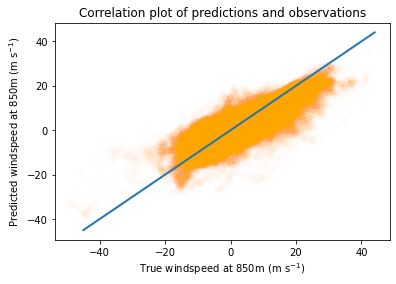

In [87]:
### Let's also produce a correlation plot of predictions against observations

perfect_fit_line = np.arange(-45,45,1)

plt.scatter(y_test, y_pred, color="orange", alpha=0.01)
plt.plot(perfect_fit_line, perfect_fit_line, linewidth = 2)
plt.title('Correlation plot of predictions and observations')
plt.xlabel('True windspeed at 850m (m s$^{-1}$)')
plt.ylabel('Predicted windspeed at 850m (m s$^{-1}$)')

plt.show()


It is hard to see the correlation here due to the high number of points. 

Let's plot a hexbin plot to try to remedy this.

Text(0, 0.5, 'Predicted windspeed at 850m (m s$^{-1}$)')

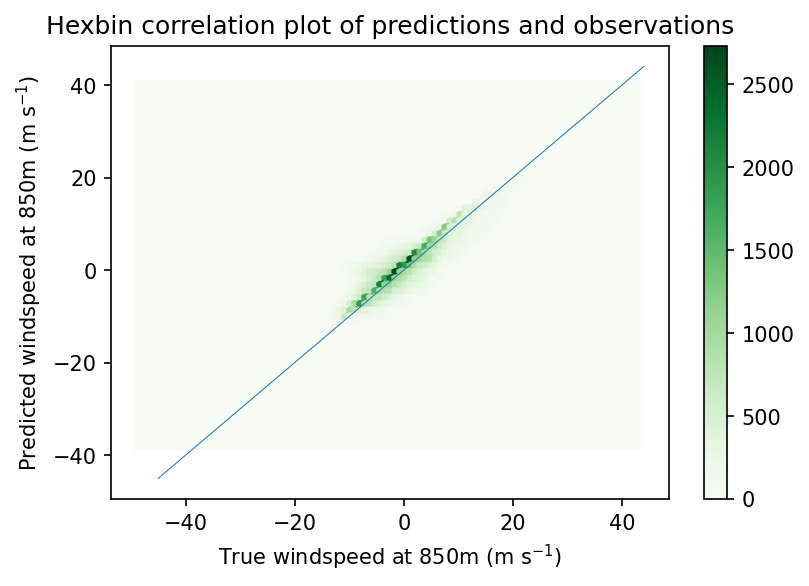

In [100]:
plt.figure(dpi=150)
plt.hexbin(y_test, y_pred, gridsize = 100, cmap ='Greens')
plt.plot(perfect_fit_line, perfect_fit_line, linewidth = 0.5) 
plt.colorbar(plt.hexbin(y_test, y_pred, gridsize = 100, cmap ='Greens')) 
plt.title('Hexbin correlation plot of predictions and observations') 
plt.xlabel('True windspeed at 850m (m s$^{-1}$)')
plt.ylabel('Predicted windspeed at 850m (m s$^{-1}$)')

## We see reasonable predictive performance on our test set.

We can easily include more variables into this model.



# Overfitting and underfitting

When training a predictive ML model, we need to critically analyse whether our model is appropriate. 

Key things to think about here are whether our model is underfitting or overfitting the data.

In the following image we see three different scenarios, with data samples shown as blue dots, the true function producing this data in orange, and the machine learning model as a blue line.

In the first example, our model *underfits* the data. It is unable to capture all the variance in the data. In the final example, our model *overfits* the data, and is unable to represent the true underlying function effectively.

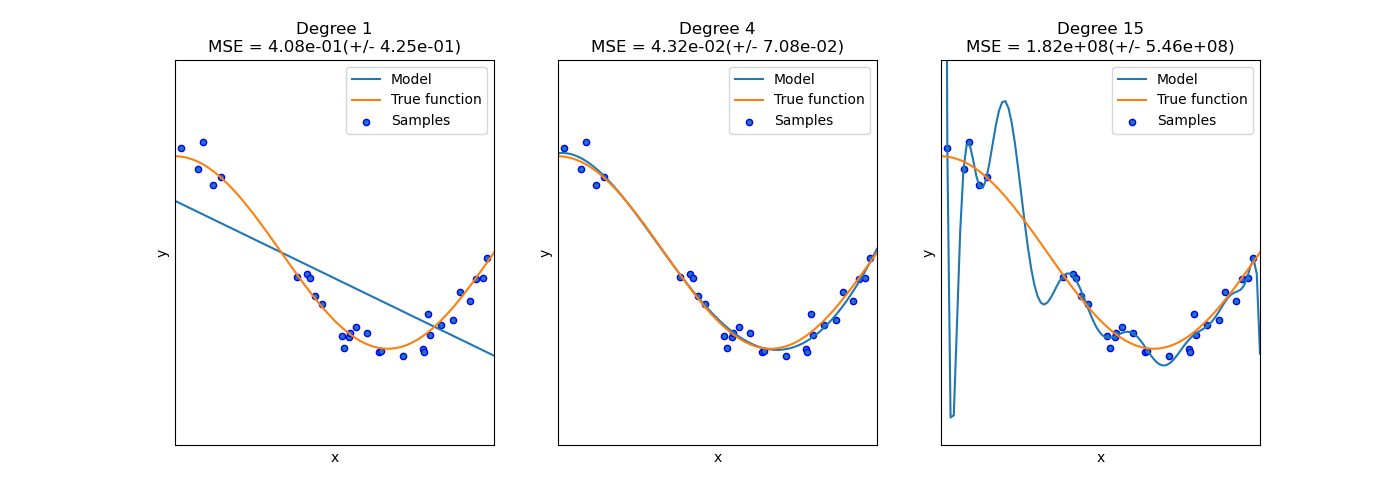

In [ ]:
### Training validation and testing set given here.

### Ira will talk further about avoiding overfitting by regularisation.

## What is the limiting factor in our work?

In this case, it is likely the model.

There are a number of models that we might choose, including decision tree based algorithms, and neural architectures, which take inspiration from the structure of the human brain.

They all follow the same principles as linear regression, however.

Random forests:

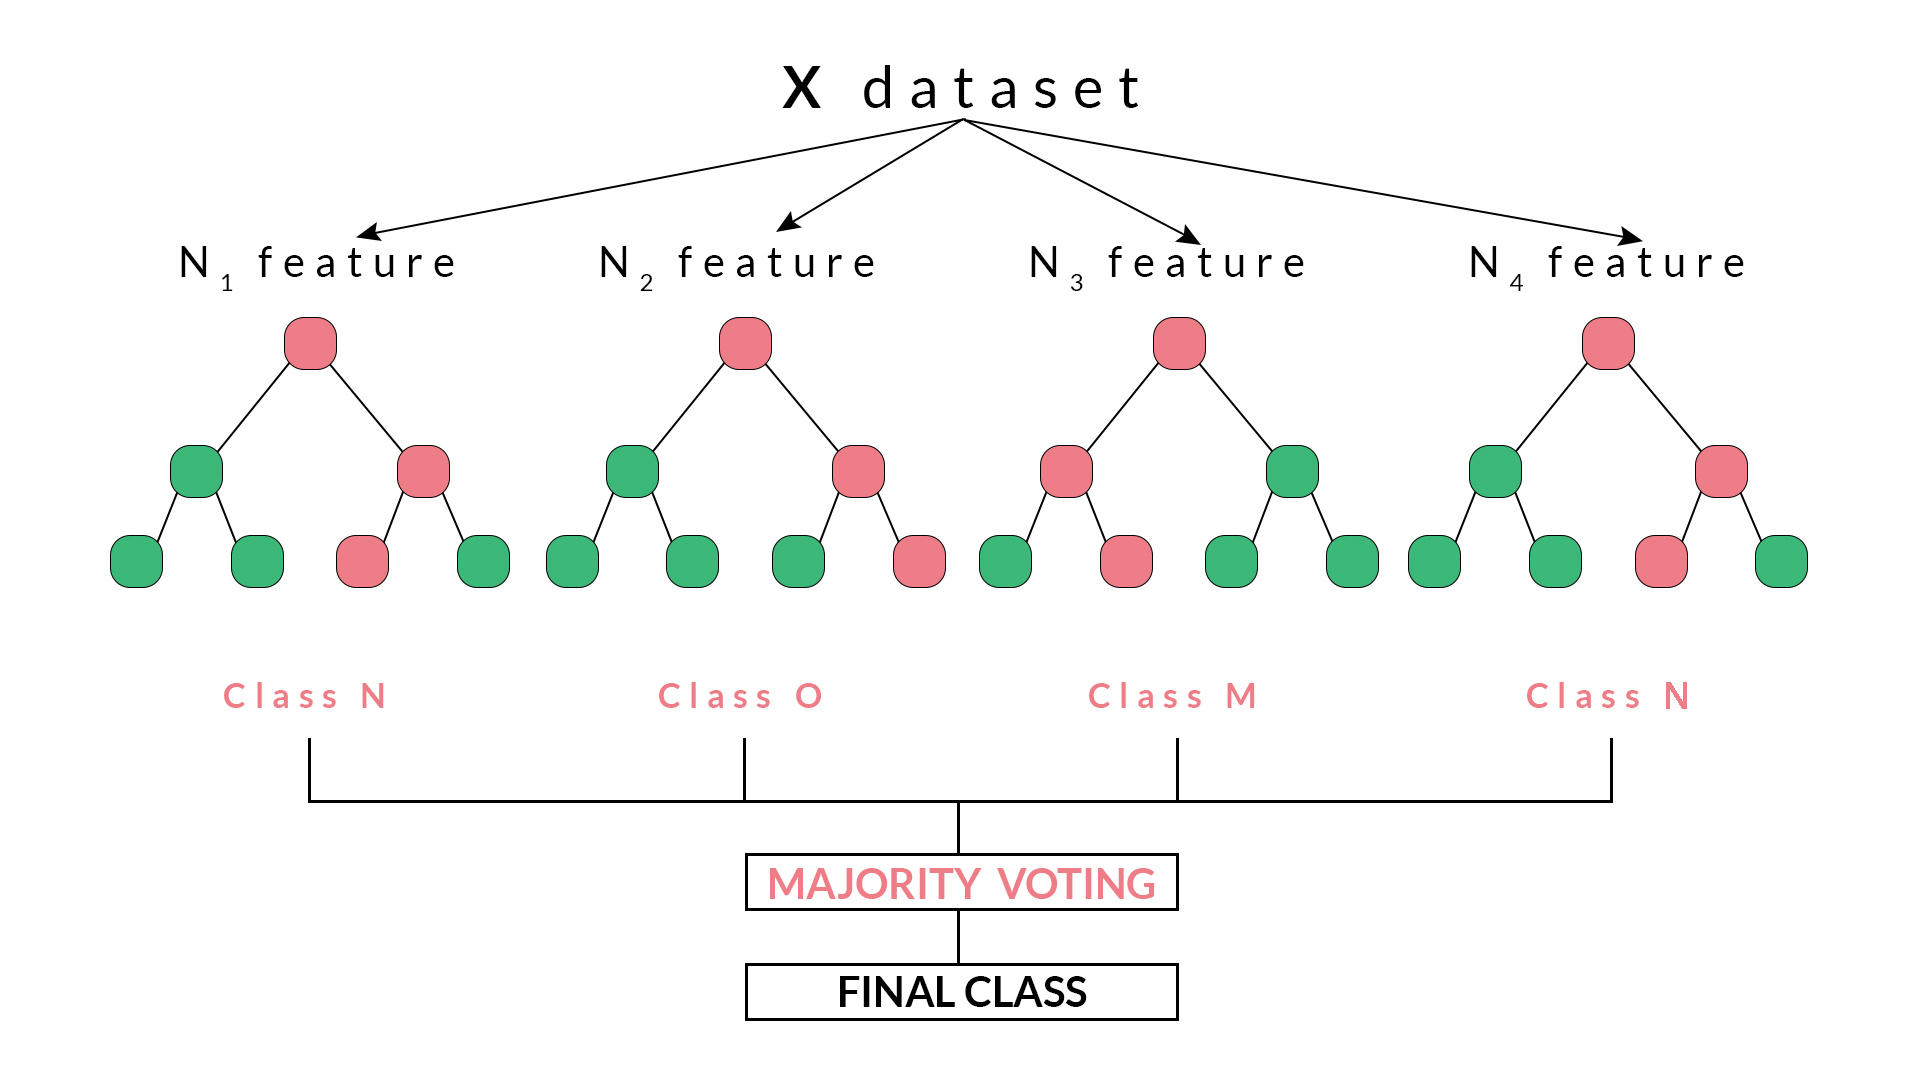

Neural networks:

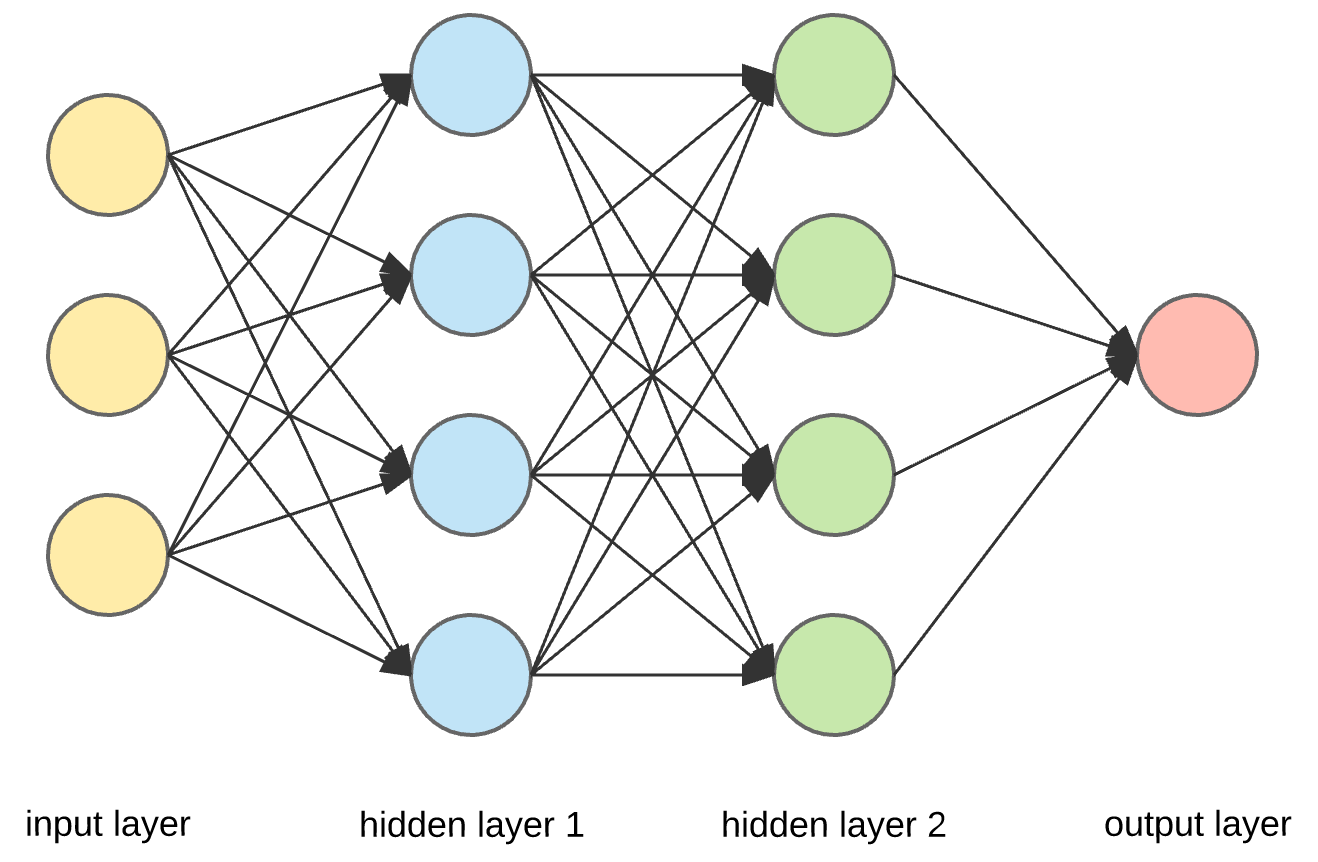

Ira will introduce more complicated models: namely, neural networks, a highly flexible class of models.